In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

from __future__ import division
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from __future__ import division
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import cv2



# Foto grande

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%matplotlib inline
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 6, 6


In [5]:
imgX = Image.open("/content/drive/MyDrive/MArylin.JPG")  # open colour image
imgX = imgX.convert('L')
img = np.asarray(imgX)
img = 2*(img > 128).astype(int)-1

In [6]:
img

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

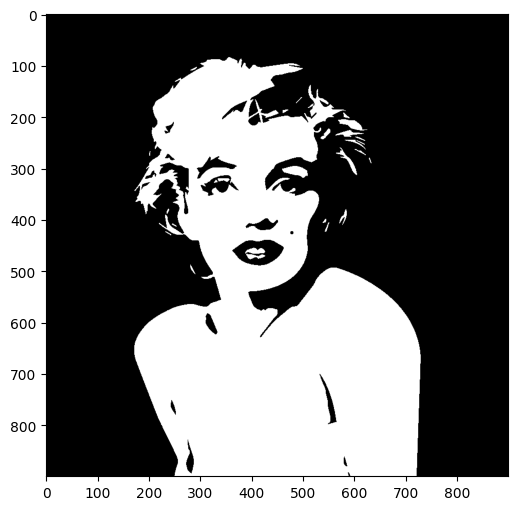

In [7]:
plt.imshow(img,cmap='gray',vmin=-1,vmax=1)
plt.show()

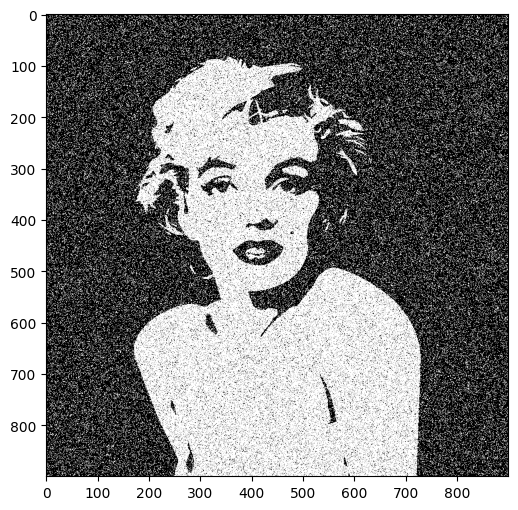

In [8]:

#create a noisy binary image
noise = np.random.random(img.shape)
noise = where(noise<0.15,-1,1)
Y = np.array(img*noise) #observed noisy binary image.

height,width = Y.shape
N = height*width

imgplot = plt.imshow(Y, cmap = cm.Greys_r)
plt.show()

## **ICM nuovo**

In [97]:

sigma_squared = 1
N = height*width

beta = 0.8 # for arbitrary parameters that reflects our prior belief

T = 6000000 # sufficient number of steps to converge stationary distribution

X = Y.copy()

errorM= np.zeros(T)
errorM[0]=np.sum(img != X)

 # Initialize Z from X
for t in range(1,T):
    i,j = np.random.choice(height), np.random.choice(width) # randomly choose a coordinate (i,j)
    X[i,j] = - X[i,j]
    errorM[t]=np.sum(img != X)
    if(errorM[t]>=errorM[t-1]):
      X[i,j] = - X[i,j]
      errorM[t]=errorM[t-1]

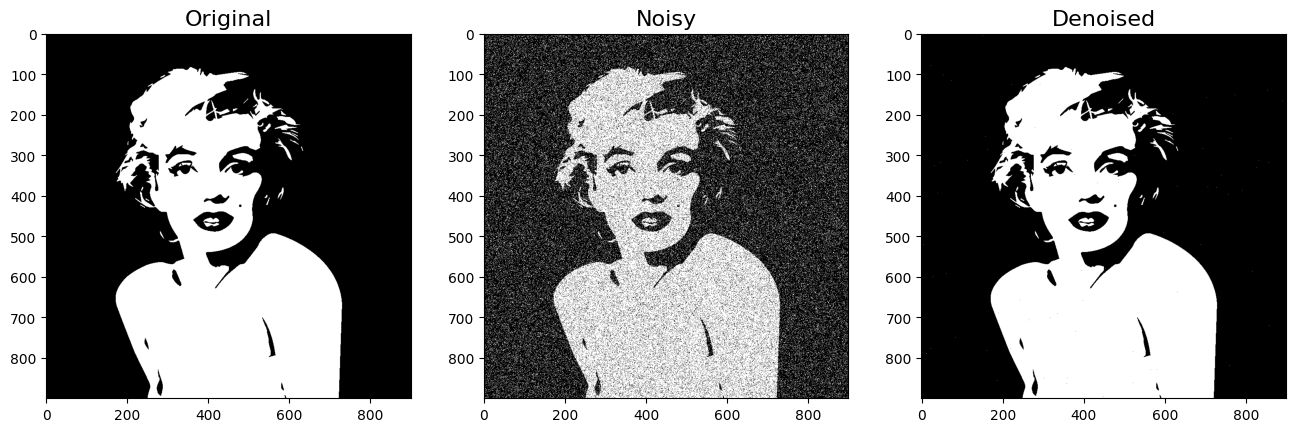

In [98]:
fig, ax = plt.subplots(1,3, figsize=(16,8))
ax[0].imshow(img,cmap='gray',vmin=-1,vmax=1)
ax[0].set_title("Original", fontsize=16)
ax[1].imshow(Y,cmap='gray',vmin=-1,vmax=1)
ax[1].set_title("Noisy", fontsize=16)
ax[2].imshow(X,cmap='gray',vmin=-1,vmax=1)
ax[2].set_title("Denoised", fontsize=16)
plt.show()

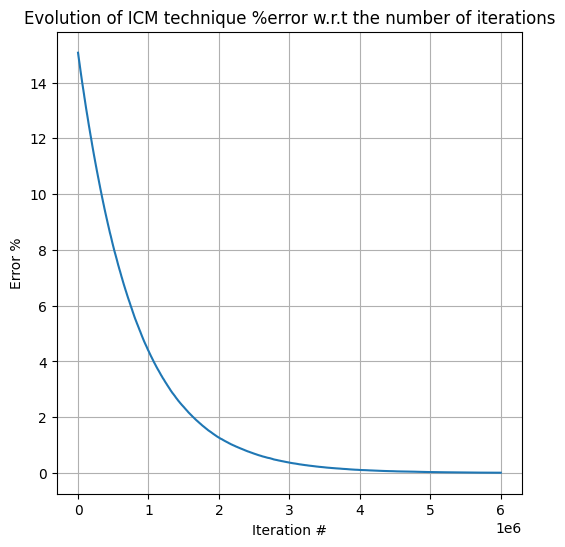

In [105]:

x = np.linspace(0, T, T)
# Plot the array against x
plt.plot(x, (errorM*100/(width*height)))
plt.xlabel('Iteration #')
plt.ylabel('Error %')
plt.title('Evolution of ICM technique %error w.r.t the number of iterations')
plt.grid(True)
plt.show()

2 orette per compilare

Salvo array errore e immagine denoisata.

In [103]:
np.save('arrayICM.npy',errorM)
np.save('imageICM.npy', X)

In [101]:
errorM[5999999]

79.0

Timing the function

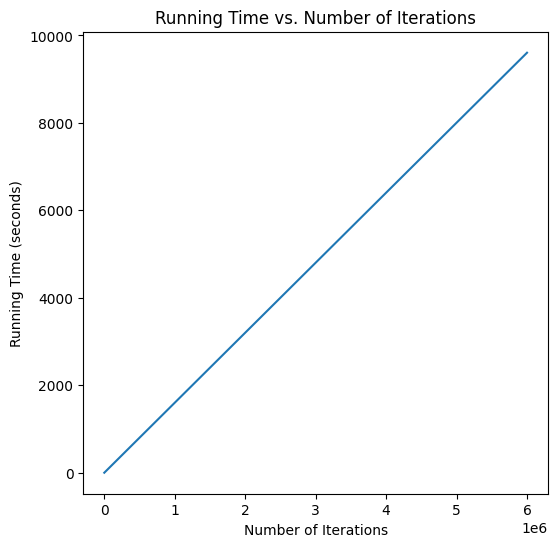

In [112]:
import timeit
import matplotlib.pyplot as plt

errorM= np.zeros(T)
errorM[0]=np.sum(img != X)

def my_function():
      i,j = np.random.choice(height), np.random.choice(width) # randomly choose a coordinate (i,j)
      X[i,j] = - X[i,j]
      errorM[1]=np.sum(img != X)
      if(errorM[1]>=errorM[0]):
        X[i,j] = - X[i,j]
        errorM[1]=errorM[0]

execution_time = [0] * (T + 1)  # Initialize the list of execution times

# Calculate execution times for the first iteration
execution_time[1] = timeit.timeit(my_function, number=1)

for i in range(2, T + 1):
    execution_time[i] = execution_time[1] * i

iterations = range(1, T + 1)  # Number of iterations



plt.plot(iterations, execution_time[1:])
plt.xlabel('Number of Iterations')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time vs. Number of Iterations')
plt.show()

# **rifare tutto insieme**